In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

In [4]:
print(test_images.shape)
print(train_images.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

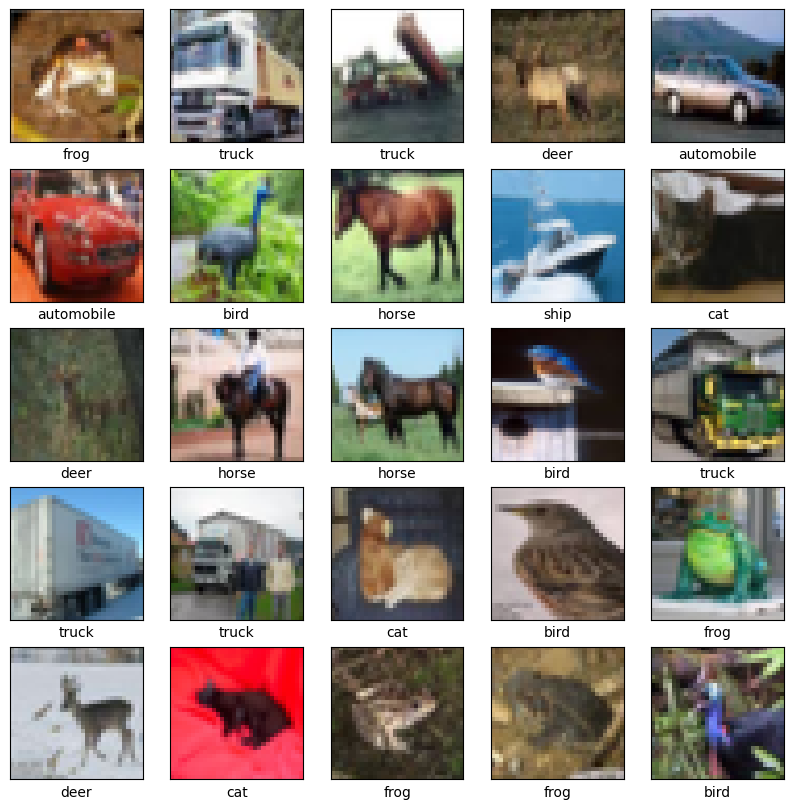

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# from_logits = true it will apply softmax internally and we say that output are not probabilities
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [10]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 25s 12ms/step - loss: 1.5125 - accuracy: 0.4477 - val_loss: 1.2936 - val_accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1424 - accuracy: 0.5958 - val_loss: 1.0514 - val_accuracy: 0.6284
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9875 - accuracy: 0.6529 - val_loss: 0.9506 - val_accuracy: 0.6638
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8848 - accuracy: 0.6916 - val_loss: 0.9367 - val_accuracy: 0.6774
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8090 - accuracy: 0.7160 - val_loss: 0.8853 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7478 - accuracy: 0.7384 - val_loss: 0.9119 - val_accuracy: 0.6908
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6958 - accuracy: 0.7563 - val_loss: 0.9198 - val_accu

In [11]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\n Test Accuracy is : {test_acc}')

313/313 - 1s - loss: 0.9108 - accuracy: 0.7118 - 654ms/epoch - 2ms/step

 Test Accuracy is : 0.7117999792098999


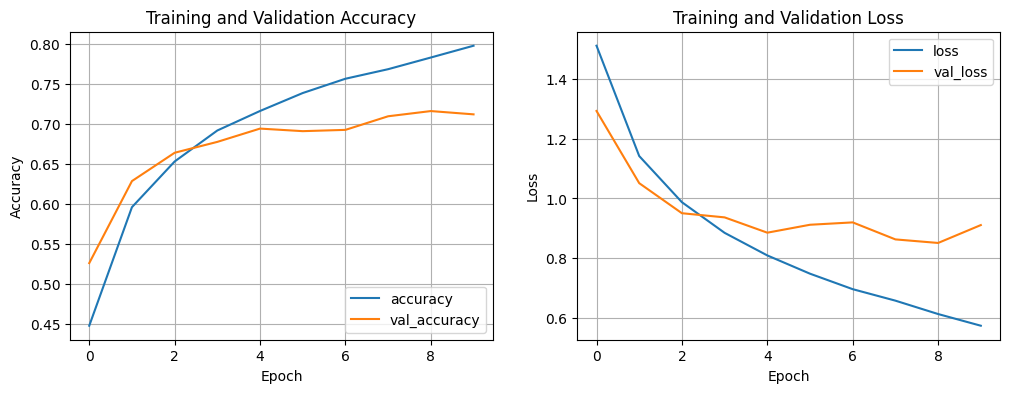

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

**BASIC HYPER PARAMETER TUNING**

In [1]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.4 MB/s eta 0:00:00


In [11]:
def build_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units',min_value=32,max_value=128,step=16),(3,3),activation='relu',input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units',min_value=32,max_value=128,step=16),(3,3),activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv3_units',min_value=32,max_value=128,step=16),(3,3),activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units',min_value=32,max_value=128,step=16),activation='relu'))
  model.add(layers.Dropout(hp.Float('dropout_rate',min_value=0.0,max_value=0.5,step=0.1)))
  model.add(layers.Dense(10))

  optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4]))
  model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

In [12]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=10,executions_per_trial=1,directory='mydir',project_name='cifar10')

In [13]:
tuner.search(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Trial 10 Complete [00h 00m 51s]
val_accuracy: 0.640999972820282

Best val_accuracy So Far: 0.6890000104904175
Total elapsed time: 00h 10m 47s


In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [15]:
model = tuner.hypermodel.build(best_hps)

In [16]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5301 - accuracy: 0.4472 - val_loss: 1.2798 - val_accuracy: 0.5399
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1291 - accuracy: 0.6019 - val_loss: 1.0574 - val_accuracy: 0.6277
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9778 - accuracy: 0.6577 - val_loss: 0.9524 - val_accuracy: 0.6679
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8664 - accuracy: 0.6952 - val_loss: 0.8971 - val_accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8000 - accuracy: 0.7208 - val_loss: 0.8813 - val_accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7365 - accuracy: 0.7421 - val_loss: 0.8363 - val_accuracy: 0.7117
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6867 - accuracy: 0.7618 - val_loss: 0.8668 - val_accuracy

In [18]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\n Test Accuracy is : {test_acc}')

313/313 - 1s - loss: 0.8986 - accuracy: 0.7047 - 685ms/epoch - 2ms/step

 Test Accuracy is : 0.7046999931335449


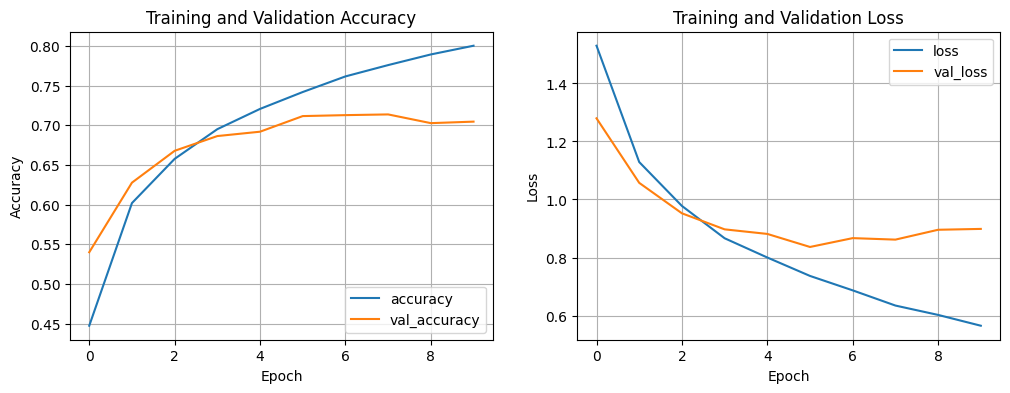

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

**Advance Hyperparameter tuning**

In [19]:
from warnings import filters
def build_model(hp):
  model = models.Sequential()

  for i in range(hp.Int('conv_layers',1,3)):
    if i == 0:
      model.add(layers.Conv2D(
          filters = hp.Int('filters_' + str(i),min_value=32,max_value=128,step=16),
          kernel_size = (3,3),
          activation = 'relu',
          input_shape=(32,32,3)
      ))
    else:
      model.add(layers.Conv2D(
          filters = hp.Int('filters_' + str(i),min_value=32,max_value=128,step=16),
          kernel_size = (3,3),
          activation = 'relu',
          padding='same'
      ))

      model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Flatten())

  for i in range(hp.Int('dense_layers',1,3)):
    model.add(layers.Dense(
        units = hp.Int('units_' + str(i),min_value=32,max_value=128,step=16),
        activation = 'relu'))

    model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i),min_value=0.0,max_value=0.5,step=0.1)))

  model.add(layers.Dense(10))

  optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4]))
  model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

In [20]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=10,executions_per_trial=1,directory='mydir1',project_name='cifar10')

In [21]:
tuner.search(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Trial 10 Complete [00h 01m 01s]
val_accuracy: 0.6444000005722046

Best val_accuracy So Far: 0.7488999962806702
Total elapsed time: 00h 11m 07s


In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [23]:
model = tuner.hypermodel.build(best_hps)

In [24]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2923 - accuracy: 0.5392 - val_loss: 1.0355 - val_accuracy: 0.6361
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8515 - accuracy: 0.7052 - val_loss: 0.8367 - val_accuracy: 0.7073
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6933 - accuracy: 0.7585 - val_loss: 0.8074 - val_accuracy: 0.7241
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5700 - accuracy: 0.8017 - val_loss: 0.7759 - val_accuracy: 0.7424
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4636 - accuracy: 0.8356 - val_loss: 0.8103 - val_accuracy: 0.7384
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3728 - accuracy: 0.8675 - val_loss: 0.8420 - val_accuracy: 0.7346
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2922 - accuracy: 0.8970 - val_loss: 0.9886 - val_a

In [25]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\n Test Accuracy is : {test_acc}')

313/313 - 1s - loss: 1.3741 - accuracy: 0.7208 - 848ms/epoch - 3ms/step

 Test Accuracy is : 0.72079998254776


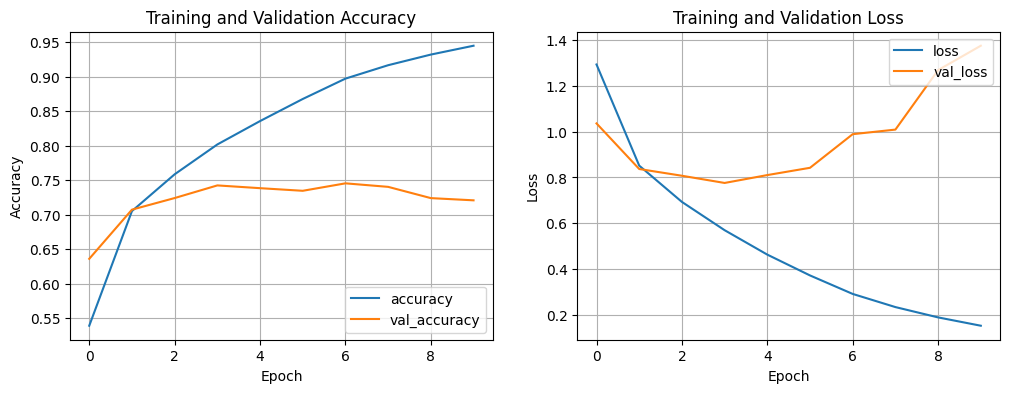

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()